In [226]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Dùng pandas để hiển thị data
Ta quy định trước
- Những điển có nhân là nghĩa là sẽ có màu đỏ
- Những điểm có nhân là 1 nghĩa là sẽ có màu xanh

In [227]:
data = pd.read_csv("./marks.txt")

In [228]:
x_to_display = data.iloc[:, :-1]

# Lấy nhãn ra khỏi data

In [229]:
y_to_display = data.iloc[:, -1]

# lấy dữ liệu màu đỏ có nhãn là 0 

In [230]:
reds = data.loc[y_to_display == 0] # Reds: 0

# Lấy dữ liệu có màu xanh

In [231]:
blues = data.loc[y_to_display == 1] # Blues: 1

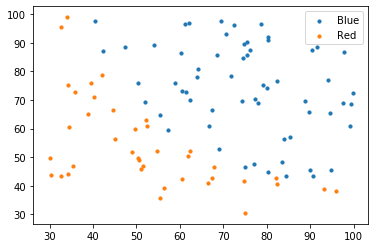

In [232]:
plt.scatter(blues.iloc[:, 0], blues.iloc[:, 1], s=10, label='Blue')
plt.scatter(reds.iloc[:, 0], reds.iloc[:, 1], s=10, label='Red')
plt.legend()
plt.show()

# Sử dụng numpy để tách dữ liệu 

In [233]:
from numpy import genfromtxt
my_data = genfromtxt('./marks.txt', delimiter=',')

X, y = my_data[:, :-1], my_data[:, -1]

X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
y = np.reshape(y, (y.shape[0], 1))

# Chú ý : 
Chia data thành 2 bộ:
- train, test độ chính xác sau khi train.
- Ngoài ra còn có 1 bộ test validation test để kiểm tra độ chính xác của mô hình khi train.
Nhưng bài này tôi chỉ dùng 2 bộ train và test

In [234]:
# 95 điểm dữ liệu dành để train
train_x = X[:95] # Shape(95, 3)
train_y = y[:95] # Shape(95, 1)

In [235]:
# 5 điểm dữ liệu dành cho test
test_x = X[95:] # Shape(5, 3)
test_y = y[95:] # Shape(5, 1)

# Mục tiêu:
- Ta phải tìm đoờng có thể phân cách 2 vùng dữ liệu màu xanh và màu đỏ 

# Hàm Sigmoid

In [236]:
def cal_z(x, theta):
    """
    Parameters
    ----------
    x shape: (95, 3) 
    theta shape: (3, 1)
    Returns
    ----------
    z shape (95, 1)
    """
    return np.dot(x, theta)

In [237]:
def sigmoid(z):
    """
    Parameters
    z shape: (95, 1)
    Returns
    output shape: (95, 1)
    """
    return 1 / (1 + np.exp(-z))

In [238]:
def cal_h_theta(x, theta):
    """
    Parameters
    ----------
    x shape: (95, 3)
    theta shape: (3, 1)
    Returns
    ----------
    output shape: (95, 1)
    """
    z = cal_z(x, theta)
    return sigmoid(z)

In [239]:
def loss_function(x, y, theta):
    """
    Parameters
    ----------
    x shape: (95, 3)
    y shape: (95, 1)
    theta shape: (3, 1)
    Returns
    ----------
    loss: float
    """
    h_theta = cal_h_theta(x, theta)
    loss = -(y*np.log(h_theta) + (1-y)*np.log(1-h_theta))
    return np.mean(loss)

In [240]:

def gradient(x, y, theta):
    """
    Parameters
    ----------
    x shape: (95, 3)
    y shape: (95, 1)
    theta shape: (3, 1)
    Returns
    ----------
    grad shape: (3, 1)
    """
    h_theta = cal_h_theta(x, theta)
    grad = np.mean(x*(h_theta-y), axis=0)
    return grad.reshape((grad.shape[0], 1))

In [241]:
# Chuẩn hoá dữ liệu
# Quá trình này làm hài hoà mức độ ảnh hưởng của các biến với đầu ta. Ta sẽ nói kỹ về quá trình này trong các bài sau.
def normalize_data(train_x, test_x):
    train_mean = np.mean(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    train_std = np.std(train_x, axis=(0,1), dtype=np.float64, keepdims=True)
    
    train_x = (train_x-train_mean)/train_std
    test_x = (test_x-train_mean)/train_std
    return train_x, test_x

In [242]:
theta = np.zeros((X.shape[1], 1))

In [243]:
theta

array([[0.],
       [0.],
       [0.]])

# Số lượt train và tốc độ học 

In [244]:
num_epoches = 10000
learning_rate = 0.1


train_x, test_x = normalize_data(train_x, test_x)

for e in range(num_epoches):
    # Tính gradient
    grad = gradient(train_x, train_y, theta)
    
    # Update theta
    theta = theta - learning_rate * grad
    total_loss = loss_function(train_x, train_y, theta)
    
    
    if e % 1000 == 0:
        print(total_loss)
    
print('Training finished')

0.6842137368800885
0.2464098058150572
0.2184435199345875
0.20867475949122966
0.2040200257961723
0.20146480448052007
0.19994282942713038
0.1989869819478821
0.1983640951064626
0.19794706640158616
Training finished


In [245]:
X.shape

(100, 3)

In [246]:
theta

array([[6.55693257],
       [6.23111232],
       [5.3590858 ]])

# Tiến hành dự đoán 
Ta cho output của hàm sigmoid ra lớn hơn hoặc bằng 0.5 sẽ là nhãn 1 và nhỏ hơn 0.5 sẽ là nhãn 0

In [247]:
predicted_classes = (cal_h_theta(test_x, theta) >= 0.5).astype(int)

In [248]:
accuracy = np.mean(predicted_classes == test_y) * 100

In [249]:
accuracy

80.0